<a href="https://colab.research.google.com/github/Yash-slr/SCT_TrackCode_TaskNumber/blob/main/CatDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading cat images...


100%|██████████| 2211/2211 [00:42<00:00, 52.27it/s] 


Loading dog images...


100%|██████████| 3062/3062 [00:42<00:00, 72.52it/s] 


Total images loaded: 5265
Training SVM classifier...
Evaluating...
Classification Report:
              precision    recall  f1-score   support

         Cat       0.44      0.53      0.48       442
         Dog       0.60      0.52      0.56       611

    accuracy                           0.52      1053
   macro avg       0.52      0.52      0.52      1053
weighted avg       0.54      0.52      0.53      1053

Accuracy: 52.23%


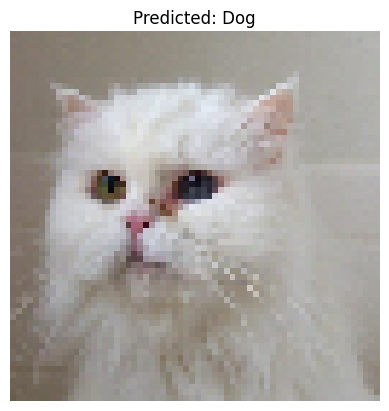

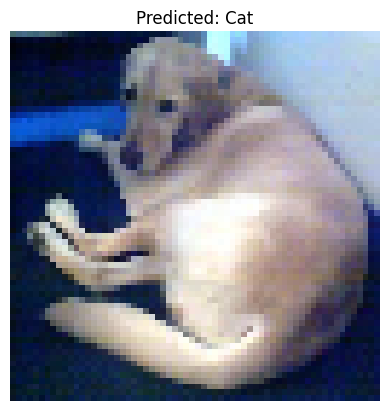

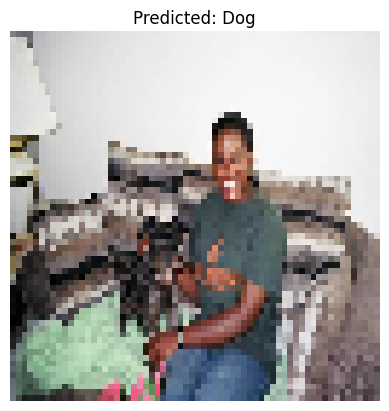

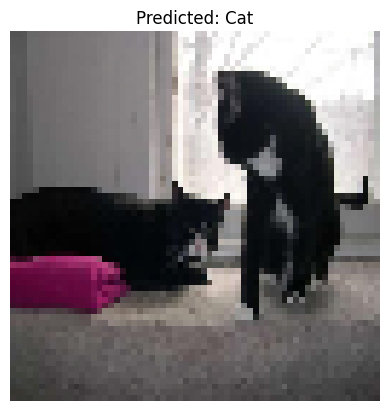

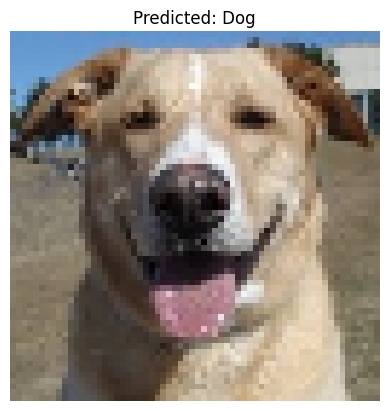

Upload an image of a cat or dog for prediction:


Saving 46.jpg to 46.jpg
Prediction: Cat (Confidence: 51.3%)


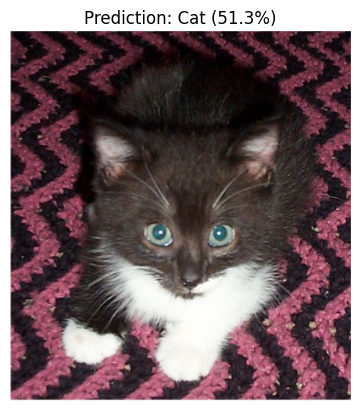

In [5]:

# 2. Imports
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

# 3. Function definitions
def load_data(cat_folder, dog_folder, image_size):
    X, y = [], []
    print("Loading cat images...")
    for filename in tqdm(os.listdir(cat_folder)):
        try:
            img_path = os.path.join(cat_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:
                continue
            img = cv2.resize(img, (image_size, image_size))
            X.append(img.flatten())
            y.append(0)
        except:
            continue
    print("Loading dog images...")
    for filename in tqdm(os.listdir(dog_folder)):
        try:
            img_path = os.path.join(dog_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:
                continue
            img = cv2.resize(img, (image_size, image_size))
            X.append(img.flatten())
            y.append(1)
        except:
            continue
    return np.array(X), np.array(y)

def show_predictions(X_test, y_pred, image_size, scaler):
    for idx in np.random.choice(len(X_test), min(5, len(X_test)), replace=False):
        img_flat = X_test[idx]  # shape: (12288,)
        # Undo scaling and convert to uint8 for display
        img_unscaled = img_flat * scaler.scale_ + scaler.mean_
        img_uint8 = np.clip(img_unscaled, 0, 255).astype(np.uint8)
        img_uint8 = img_uint8.reshape(image_size, image_size, 3)
        label = "Dog" if y_pred[idx] == 1 else "Cat"
        plt.imshow(cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted: {label}")
        plt.axis('off')
        plt.show()


# 4. Set your dataset path
dataset_path = '/content/drive/MyDrive/PetImages'
cat_folder = f"{dataset_path}/Cat"
dog_folder = f"{dataset_path}/Dog"
IMAGE_SIZE = 64

# 5. Main code
X, y = load_data(cat_folder, dog_folder, IMAGE_SIZE)
print(f"Total images loaded: {len(X)}")
if len(X) == 0:
    print("No images were loaded. Check the dataset path and folder names.")
else:
    # Feature scaling for SVM
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    print("Training SVM classifier...")
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    print("Evaluating...")
    y_pred = clf.predict(X_test)

    # Always provide both labels and target_names for classification_report
    labels = [0, 1]
    target_names = ['Cat', 'Dog']
    print("Classification Report:")
    print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    show_predictions(X_test, y_pred, IMAGE_SIZE, scaler)

    # 6. User uploads a file for prediction
    from google.colab import files
    print("Upload an image of a cat or dog for prediction:")
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        if img is not None:
            img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE)).flatten()
            img_scaled = scaler.transform([img_resized])
            pred = clf.predict(img_scaled)[0]
            proba = clf.predict_proba(img_scaled)[0]
            confidence = np.max(proba) * 100
            label = 'Dog' if pred == 1 else 'Cat'
            print(f"Prediction: {label} (Confidence: {confidence:.1f}%)")
            img_show = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
            plt.imshow(img_show)
            plt.title(f"Prediction: {label} ({confidence:.1f}%)")
            plt.axis('off')
            plt.show()
        else:
            print("Could not read uploaded image.")
